# Import Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set up Data Matrix

In [11]:
D = 2
N = 500

X0 = np.random.randn((N//2),D) + np.array([2,2])
X1 = np.random.randn((N//2),D) + np.array([-2,-2])

X = np.vstack((X0,X1))
X[-10:,:] += np.array([5,2])

y = np.array([0]*(N//2) + [1]*(N//2))

X = np.column_stack((np.ones((N,1)), X))

# Functions

In [12]:
def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y,p_hat):
    return -np.sum(y*np.log(p_hat) + (1-y)*np.log(1-p_hat))

def accuracy(y,y_hat):
    return np.mean(y == y_hat)

# Gradient Descent and Plotting Objective Functions

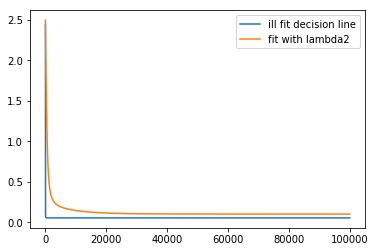

In [19]:
w = np.random.randn(D+1)
w2 = w.copy()

lambda2 = 10
eta = 1e-3
epochs = int(1e5)
J = [0]*epochs
J2 = [0]*epochs

for epoch in range(epochs):
    p_hat = sigmoid(X.dot(w))
    p_hat2 = sigmoid(X.dot(w2))
    
    J[epoch] = cross_entropy(y,p_hat)/N
    J2[epoch] = cross_entropy(y,p_hat2)/N + lambda2*np.sum(w2**2)/(2*N)
    
    w -= eta*X.T.dot(p_hat - y)
    w2 -= eta*( X.T.dot(p_hat2 - y) + lambda2*w2 )/N
    
plt.figure()
plt.plot(J, label='ill fit decision line')
plt.plot(J2, label='fit with lambda2')
plt.legend()

# Plot Data, Ill-Fit Line, and Fit with $\lambda_2$.

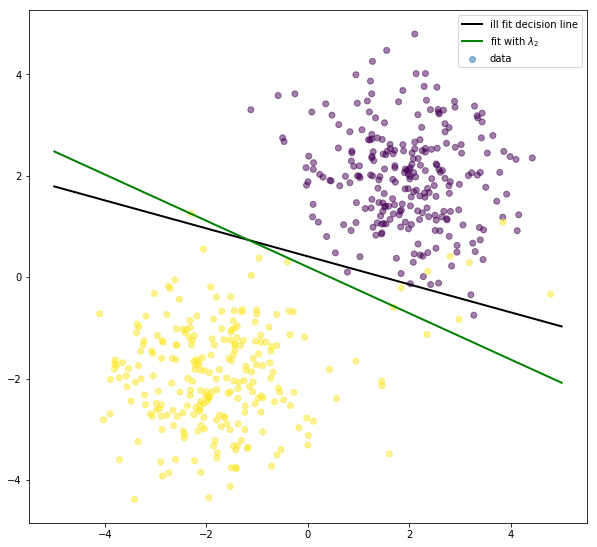

In [20]:
x1 = np.linspace(-5,5,50)
x2 = -(w[0]/w[2]) - (w[1]/w[2])*x1
x3 = -(w2[0]/w2[2]) - (w2[1]/w2[2])*x1

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(X[:,1], X[:,2], c=y, alpha=.5, label="data")
ax.plot(x1,x2, color='k', linewidth=2, label="ill fit decision line")
ax.plot(x1,x3, color='g', linewidth=2, label="fit with $\lambda_2$")
ax.legend(loc='best')
ax.set_aspect(1)

# Comparing Accuracies of Ill-Fit Line and Fit with $\lambda_2$.

In [22]:
y_hat = np.round(p_hat)
y_hat2 = np.round(p_hat2)
print("ill-fit Accuracy: {:0.4f}".format(accuracy(y,y_hat)))
print("fit with lambda2 Accuracy: {:0.4f}".format(accuracy(y,y_hat2)))

ill-fit Accuracy: 0.9840
fit with lambda2 Accuracy: 0.9840
